In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

df=pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [20]:
#Mean, std, and quartiles of dataset
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [31]:
df=df[['BMI','Sex','AgeCategory','Race','PhysicalHealth','Smoking','Diabetic','HeartDisease']]
df

,BMI,Sex,AgeCategory,Race,PhysicalHealth,Smoking,Diabetic,HeartDisease
0,16.60,Female,55-59,White,3,Yes,Yes,No
1,20.34,Female,80 or older,White,0,No,No,No
2,26.58,Male,65-69,White,20,Yes,Yes,No
3,24.21,Female,75-79,White,0,No,No,No
4,23.71,Female,40-44,White,28,No,No,No
...,...,...,...,...,...,...,...,...
319790,27.41,Male,60-64,Hispanic,7,Yes,Yes,Yes
319791,29.84,Male,35-39,Hispanic,0,Yes,No,No
319792,24.24,Female,45-49,Hispanic,0,No,No,No
319793,32.81,Female,25-29,Hispanic,0,No,No,No


In [23]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
BMI               0
Sex               0
AgeCategory       0
Race              0
PhysicalHealth    0
Smoking           0
Diabetic          0
dtype: int64


In [32]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
PhysicalHealth : [ 3  0 20 28  6 15  5 30  7  1  2 21  4 10 14 18  8 25 16 29 27 17 24 12
 23 26 22 19  9 13 11]
Smoking : ['Yes' 'No']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
HeartDisease : ['No' 'Yes']


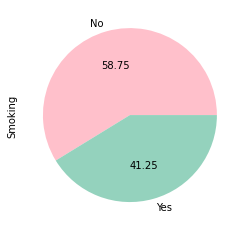

In [33]:
#Distribution of gender by pie-chart
df['Smoking'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

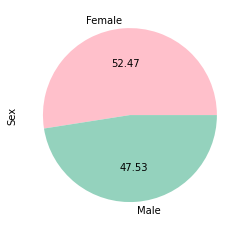

In [34]:
#Distribution of gender by pie-chart
df['Sex'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

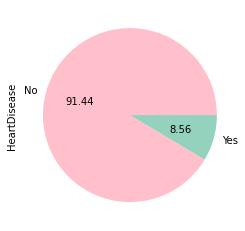

In [35]:
#Distribution of gender by pie-chart
df['HeartDisease'].value_counts().plot(kind="pie", autopct="%.2f", colors = ['pink', '#94d2bd'])
plt.show()

<AxesSubplot:>

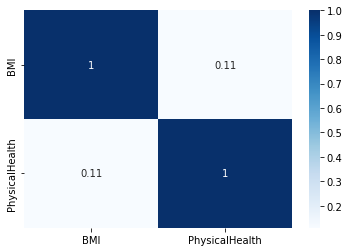

In [36]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [37]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(319795, 8)


In [38]:
#Replacing categorical data with integer values

df['Diabetic'].replace(['Yes (during pregnancy)','No, borderline diabetes'],['Yes','No'], inplace=True)
df.head(7)


,BMI,Sex,AgeCategory,Race,PhysicalHealth,Smoking,Diabetic,HeartDisease
0,16.60,Female,55-59,White,3,Yes,Yes,No
1,20.34,Female,80 or older,White,0,No,No,No
2,26.58,Male,65-69,White,20,Yes,Yes,No
3,24.21,Female,75-79,White,0,No,No,No
4,23.71,Female,40-44,White,28,No,No,No
5,28.87,Female,75-79,Black,6,Yes,No,Yes
6,21.63,Female,70-74,White,15,No,No,No


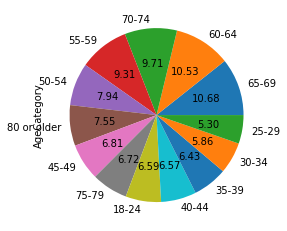

In [39]:
#Distribution of genre by pie-chart
df['AgeCategory'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

<AxesSubplot:xlabel='HeartDisease', ylabel='Sex'>

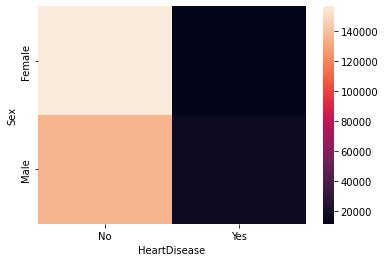

In [48]:
#Correlation between which Genre is preferred by age groups when Relaxing
#df=df[['BMI','Sex','AgeCategory','Race','PhysicalHealth','Smoking','Diabetic','HeartDisease']]
sns.heatmap(pd.crosstab(df['Sex'], df['HeartDisease']))